In [1229]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
tf.random.set_seed(1234)
import os
import random

# Random

In [1230]:
os.environ['PYTHONHASHSEED']=str(1234)
tf.random.set_seed(1234)
np.random.seed(1234)
random.seed(1234)

In [1231]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from keras import optimizers
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
from mlxtend.plotting import plot_decision_regions
%matplotlib inline


In [1232]:
from sklearn.metrics import roc_curve, roc_auc_score,auc


In [1233]:
PCA_df = pd.read_csv("FeaturesPCA_dropped.csv",index_col=[0])
PCA_df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,-0.572855,0.775703,-0.555175,-0.668609,0.206971,0.311069,0.004777,-0.218921,0.021354,0.522483,...,0.065758,0.117052,0.313998,0.083378,0.270367,0.613181,-0.032338,-0.291381,-0.346303,-0.057003
1,0.378881,-0.054257,-0.140639,-0.745776,0.054000,-0.078432,0.065719,-0.312667,-0.300151,0.531537,...,0.184845,0.130041,-0.281455,-0.216349,0.080771,0.129352,0.079545,-0.117099,0.032437,0.089642
2,0.378855,-0.298639,-0.214987,-0.136841,-0.174487,0.944021,0.676052,0.005444,0.292429,-0.035979,...,-0.126694,0.162750,0.056158,0.233953,0.037804,-0.182907,0.073337,0.190404,0.210340,-0.395110
3,-0.385298,0.650624,-0.147322,-0.262479,0.156089,0.317733,-0.001556,-0.057074,0.389654,0.725043,...,-0.120545,-0.025797,0.037880,0.050543,0.093189,0.009083,0.240156,-0.030918,0.150497,-0.147013
4,-0.721262,-0.141627,0.296722,0.191071,-0.157643,-0.106280,0.209430,0.399258,-0.148421,0.039294,...,0.078502,-0.083293,0.046128,-0.067033,0.065144,0.102891,0.149844,0.059303,-0.015103,-0.049884


In [1234]:
df = pd.read_csv("drug_onehot_latest.csv")
df

,inpatient.number,Atorvastatin calcium tablet,Benazepril hydrochloride tablet,Deslanoside injection,Digoxin tablet,Dobutamine hydrochloride injection,Furosemide injection,Furosemide tablet,Hydrochlorothiazide tablet,Isoprenaline Hydrochloride injection,Isosorbide Mononitrate Sustained Release tablet,Meglumine Adenosine Cyclophosphate for injection,Milrinone injection,Nitroglycerin injection,Shenfu injection,Spironolactone tablet,Torasemide tablet,Valsartan Dispersible tablet,sulfotanshinone sodium injection
0,722128,0,0,1,1,0,1,1,0,0,0,0,1,0,0,1,0,0,0
1,723327,1,0,1,1,0,1,1,0,0,1,0,1,0,0,1,1,1,0
2,723617,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,724385,0,0,1,1,0,1,1,0,0,0,0,1,0,0,1,0,0,0
4,725509,0,0,1,1,0,1,1,0,0,0,0,1,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998,870258,0,0,0,0,1,1,1,0,0,0,0,1,1,0,1,0,1,0
1999,870646,0,1,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0
2000,879601,1,1,1,1,0,1,1,0,0,0,1,1,1,0,1,0,0,0
2001,905163,0,1,1,1,0,1,0,0,0,0,1,1,0,1,1,1,0,0


In [1235]:
df.drop(['inpatient.number'], axis=1,inplace=True)

In [1236]:
q = "Deslanoside injection"

In [1237]:
print("Running for :",q)
trainer = pd.concat([PCA_df, df[q]], axis = 1)


Running for : Deslanoside injection


In [1238]:
count_class_0, count_class_1 = trainer[q].value_counts()[0], trainer[q].value_counts()[1]

# Divide by class
df_class_0 = trainer[trainer[q] == 0]
df_class_1 = trainer[trainer[q] == 1]
if count_class_0>count_class_1:
    df_class_1_over = df_class_1.sample(count_class_0, replace=True)
    df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)
else:
    df_class_0_over = df_class_0.sample(count_class_1,replace=True)
    df_test_over = pd.concat([df_class_0_over, df_class_1], axis=0)

print('Random over-sampling:')
print(df_test_over[q].value_counts())
X = df_test_over.drop(q,axis='columns')
y = df_test_over[q]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)
loss = keras.losses.BinaryCrossentropy()
weights = -1


Random over-sampling:
0    1014
1    1014
Name: Deslanoside injection, dtype: int64


In [1239]:
# reg_model = Sequential()
# reg_model.add(Dense(64, input_dim=65, activation='relu',  kernel_regularizer='l2'))
# #reg_model.add(Dropout(0.2))
# reg_model.add(Dense(32, activation='relu',  kernel_regularizer='l2'))
# reg_model.add(Dense(16, activation='relu',  kernel_regularizer='l2'))
# #reg_model.add(Dropout(0.2))
# reg_model.add(Dense(1, activation='sigmoid', kernel_regularizer='l2'))
# reg_model.compile(loss='binary_crossentropy', 
#                   optimizer='adam', 
#                   metrics=['accuracy'])


# reg_history = reg_model.fit(X_train, y_train, 
#                             validation_data=(X_test, y_test), 
#                             epochs=100, verbose=1)

# print(reg_model.evaluate(X_test, y_test))

# y_preds = reg_model.predict(X_test)
# y_preds = np.round(y_preds)

# print("Classification Report: \n", classification_report(y_test, y_preds))

# return y_preds

# Milrinone injection

In [1240]:
# reg_model = Sequential()
# reg_model.add(Dense(128, input_dim=65, activation='relu',  kernel_regularizer='l2'))
# #reg_model.add(Dropout(0.2))
# reg_model.add(Dense(64, activation='relu',  kernel_regularizer='l2'))
# reg_model.add(Dense(32, activation='relu',  kernel_regularizer='l2'))
# #reg_model.add(Dropout(0.2))
# reg_model.add(Dense(1, activation='sigmoid', kernel_regularizer='l2'))
# reg_model.compile(loss='binary_crossentropy', 
#                   optimizer='adam', 
#                   metrics=['accuracy'])


# reg_history = reg_model.fit(X_train, y_train, 
#                             validation_data=(X_test, y_test), 
#                             epochs=100, verbose=1)

# print(reg_model.evaluate(X_test, y_test))

# y_preds = reg_model.predict(X_test)
# y_preds = np.round(y_preds)

# print("Classification Report: \n", classification_report(y_test, y_preds))


# Atorvastatin calcium tablet

In [1241]:
# reg_model = Sequential()
# reg_model.add(Dense(128, input_dim=65, activation='relu',  kernel_regularizer='l2'))
# reg_model.add(Dropout(0.2))
# reg_model.add(Dense(64, activation='relu',  kernel_regularizer='l2'))
# reg_model.add(Dense(32, activation='relu',  kernel_regularizer='l2'))
# # reg_model.add(Dropout(0.2))
# reg_model.add(Dense(1, activation='sigmoid', kernel_regularizer='l2'))
# reg_model.compile(loss='binary_crossentropy', 
#                   optimizer='adam', 
#                   metrics=['accuracy'])


# reg_history = reg_model.fit(X_train, y_train, 
#                             validation_data=(X_test, y_test), 
#                             epochs=100, verbose=1)

# print(reg_model.evaluate(X_test, y_test))

# y_preds = reg_model.predict(X_test)
# y_preds = np.round(y_preds)

# print("Classification Report: \n", classification_report(y_test, y_preds))

# Deslanoside injection

In [1242]:
reg_model = Sequential()
reg_model.add(Dense(128, input_dim=65, activation='relu',  kernel_regularizer='l2'))
#reg_model.add(Dropout(0.2))
reg_model.add(Dense(64, activation='relu',  kernel_regularizer='l2'))
reg_model.add(Dense(32, activation='relu',  kernel_regularizer='l2'))
# reg_model.add(Dropout(0.2))
reg_model.add(Dense(1, activation='sigmoid', kernel_regularizer='l2'))
reg_model.compile(loss='binary_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])


reg_history = reg_model.fit(X_train, y_train, 
                            validation_data=(X_test, y_test), 
                            epochs=100, verbose=1)

print(reg_model.evaluate(X_test, y_test))

y_preds = reg_model.predict(X_test)
y_preds = np.round(y_preds)

print("Classification Report: \n", classification_report(y_test, y_preds))

Epoch 1/100
51/51 [==============================] - 1s 4ms/step - loss: 2.2260 - accuracy: 0.5573 - val_loss: 1.6818 - val_accuracy: 0.6552
Epoch 2/100
51/51 [==============================] - 0s 2ms/step - loss: 1.3657 - accuracy: 0.6258 - val_loss: 1.1061 - val_accuracy: 0.6650
Epoch 3/100
51/51 [==============================] - 0s 2ms/step - loss: 0.9690 - accuracy: 0.6406 - val_loss: 0.8533 - val_accuracy: 0.6823
Epoch 4/100
51/51 [==============================] - 0s 2ms/step - loss: 0.7997 - accuracy: 0.6603 - val_loss: 0.7430 - val_accuracy: 0.6823
Epoch 5/100
51/51 [==============================] - 0s 2ms/step - loss: 0.7285 - accuracy: 0.6615 - val_loss: 0.6974 - val_accuracy: 0.7044
Epoch 6/100
51/51 [==============================] - 0s 2ms/step - loss: 0.6995 - accuracy: 0.6769 - val_loss: 0.6823 - val_accuracy: 0.7069
Epoch 7/100
51/51 [==============================] - 0s 2ms/step - loss: 0.6878 - accuracy: 0.6850 - val_loss: 0.6760 - val_accuracy: 0.6946
Epoch 8/100
5

In [1243]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_preds))
print(classification_report(y_test,y_preds))

[[136  67]
 [ 49 154]]
              precision    recall  f1-score   support

           0       0.74      0.67      0.70       203
           1       0.70      0.76      0.73       203

    accuracy                           0.71       406
   macro avg       0.72      0.71      0.71       406
weighted avg       0.72      0.71      0.71       406



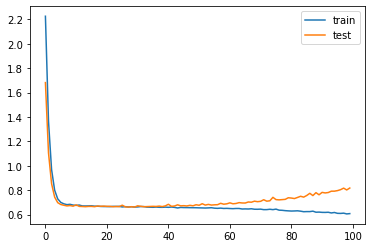

In [1244]:
plt.plot(reg_history.history['loss'], label='train')
plt.plot(reg_history.history['val_loss'], label='test')
plt.legend()
plt.show()


In [1245]:
#Predict on test set
predictions_NN_prob = reg_model.predict(X_test)
predictions_NN_prob = predictions_NN_prob[:,0]

predictions_NN_01 = np.where(predictions_NN_prob > 0.5, 1, 0) #Turn probability to 0-1 binary output


In [1246]:
#Print accuracy
acc_NN = accuracy_score(y_test, predictions_NN_01)
print('Overall accuracy of Neural Network model:', acc_NN)


Overall accuracy of Neural Network model: 0.7142857142857143


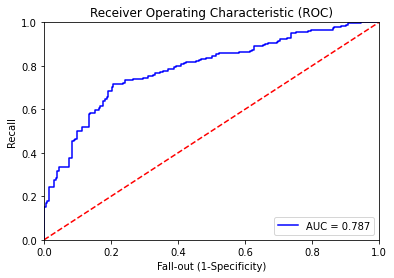

In [1247]:
false_positive_rate, recall, thresholds = roc_curve(y_test, predictions_NN_prob)
roc_auc = auc(false_positive_rate, recall)
plt.figure()
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out (1-Specificity)')
plt.show()


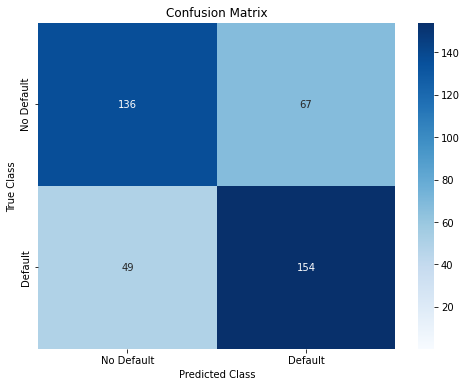

In [1248]:
cm = confusion_matrix(y_test, predictions_NN_01)
labels = ['No Default', 'Default']
plt.figure(figsize=(8,6))
sns.heatmap(cm,xticklabels=labels, yticklabels=labels, annot=True, fmt='d', cmap="Blues", vmin = 0.2);
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()
